# 📊 Proyecto Guiado - Análisis de Ventas de Videojuegos
## Parte 4: Análisis Estadístico Avanzado

---

### 🎯 Objetivos de este notebook:
1. Analizar correlaciones entre variables
2. Realizar análisis estadísticos por grupos
3. Estudiar tendencias temporales
4. Comparar comportamiento entre regiones
5. Extraer insights de negocio

---

## 1. Cargar librerías y datos limpios

In [1]:
%pip install scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

# Configuraciones
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Cargar dataset limpio
df = pd.read_csv('../data/vgsales_clean.csv')

print("✅ Dataset limpio cargado")
print(f"📦 Dimensiones: {df.shape}")
print(f"\n📋 Columnas disponibles:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2}. {col}")

✅ Dataset limpio cargado
📦 Dimensiones: (16327, 19)

📋 Columnas disponibles:
 1. Rank
 2. Name
 3. Platform
 4. Year
 5. Genre
 6. Publisher
 7. NA_Sales
 8. EU_Sales
 9. JP_Sales
10. Other_Sales
11. Global_Sales
12. Decade
13. Sales_Category
14. Dominant_Region
15. NA_Percentage
16. EU_Percentage
17. JP_Percentage
18. Other_Percentage
19. Platform_Type


---
## 2. Análisis de Correlaciones

### 2.1 Matriz de Correlación

La correlación mide la relación lineal entre dos variables:
- **1**: Correlación positiva perfecta
- **0**: Sin correlación
- **-1**: Correlación negativa perfecta

In [ ]:
# Calcular la matriz de correlación
# La correlación mide la RELACIÓN LINEAL entre dos variables numéricas

# Seleccionar solo las variables numéricas relevantes para el análisis
# Excluimos Rank porque es solo un índice ordinal, no una medida real
columnas_numericas = ['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

# ¿Qué es la correlación?
# Es un número entre -1 y 1 que indica:
# - Correlación positiva (+): Cuando una variable sube, la otra también tiende a subir
#   * +1 = correlación positiva perfecta (relación lineal exacta)
#   * +0.7 a +1 = correlación fuerte positiva
#   * +0.3 a +0.7 = correlación moderada positiva
#   * 0 a +0.3 = correlación débil positiva
#
# - Correlación negativa (-): Cuando una variable sube, la otra tiende a bajar
#   * -1 = correlación negativa perfecta
#   * -0.7 a -1 = correlación fuerte negativa
#   * -0.3 a -0.7 = correlación moderada negativa
#   * 0 a -0.3 = correlación débil negativa
#
# - Sin correlación (≈0): No hay relación lineal entre las variables
#   * Pueden estar relacionadas de forma no lineal

# Calcular matriz de correlación usando el método de Pearson (por defecto)
correlacion = df[columnas_numericas].corr()

print("📊 MATRIZ DE CORRELACIÓN")
print("=" * 80)
print(correlacion.round(3))  # Redondear a 3 decimales para legibilidad

# ¿Qué buscar en esta matriz?
# 1. Diagonal = 1.0 siempre (una variable correlaciona perfectamente consigo misma)
# 2. Matriz simétrica (correlación de A con B = correlación de B con A)
# 3. Valores altos entre regiones = comportamiento similar de mercado
# 4. Valores bajos = mercados independientes con preferencias diferentes

📊 MATRIZ DE CORRELACIÓN
               Year  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
Year          1.000    -0.091     0.006    -0.169        0.041        -0.075
NA_Sales     -0.091     1.000     0.769     0.451        0.635         0.941
EU_Sales      0.006     0.769     1.000     0.436        0.726         0.903
JP_Sales     -0.169     0.451     0.436     1.000        0.291         0.613
Other_Sales   0.041     0.635     0.726     0.291        1.000         0.748
Global_Sales -0.075     0.941     0.903     0.613        0.748         1.000


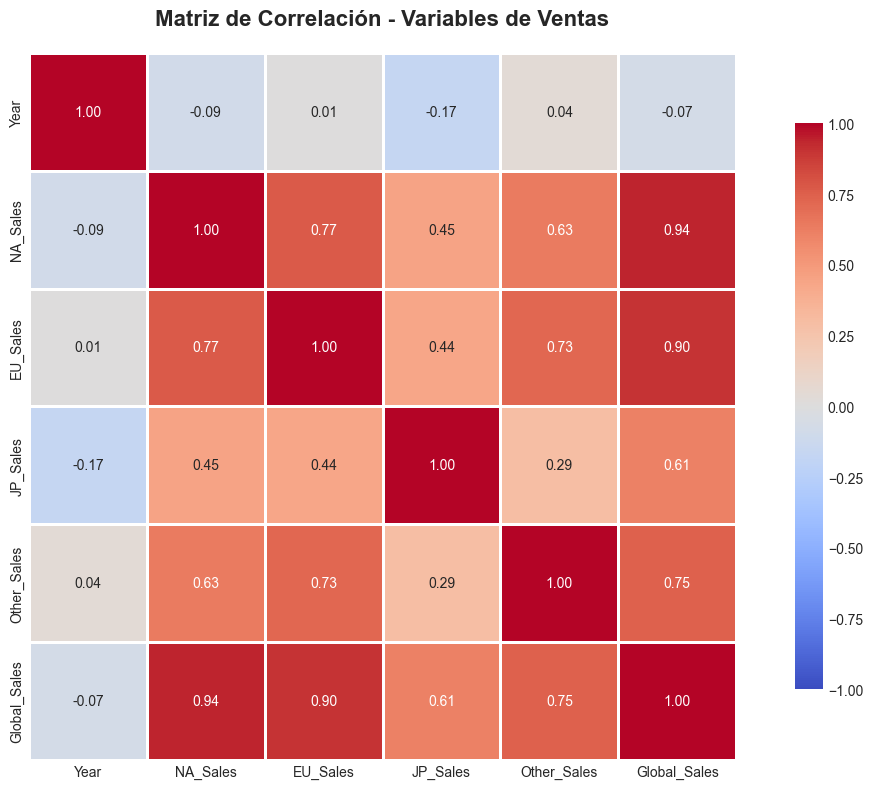


💡 Observaciones clave:
  • NA_Sales y EU_Sales tienen alta correlación positiva
  • JP_Sales tiene menor correlación con otras regiones
  • Global_Sales está altamente correlacionado con todas las regiones (lógico)


In [ ]:
# Visualización de la matriz de correlación con heatmap (mapa de calor)
# Los heatmaps son ideales para matrices porque:
# - Usan colores para representar valores numéricos
# - Facilitan identificar patrones de un vistazo
# - Muestran relaciones complejas de forma intuitiva

plt.figure(figsize=(12, 8))

# Crear heatmap usando seaborn
# seaborn hace gráficos estadísticos más bonitos que matplotlib base
sns.heatmap(correlacion, 
            annot=True,           # annot=True muestra los valores numéricos en cada celda
            cmap='coolwarm',      # Paleta de colores: azul (frío) para negativo, rojo (cálido) para positivo
            center=0,             # Centrar la escala de color en 0 (punto neutral)
            square=True,          # Hacer celdas cuadradas (no rectangulares)
            linewidths=1,         # Añadir líneas entre celdas para separación visual
            cbar_kws={"shrink": 0.8},  # Hacer la barra de colores un 80% del tamaño (más compacta)
            fmt='.2f',            # Formato de números: 2 decimales
            vmin=-1, vmax=1)      # Rango de valores: -1 a 1 (rango completo de correlaciones)

plt.title('Matriz de Correlación - Variables de Ventas', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Interpretación del output esperado:
print("\n💡 Observaciones clave que deberías ver:")
print("  • NA_Sales y EU_Sales tienen alta correlación positiva (~0.7-0.8)")
print("    → Los juegos que venden bien en Norteamérica suelen vender bien en Europa")
print("    → Mercados occidentales tienen gustos similares")
print("\n  • JP_Sales tiene menor correlación con NA y EU (~0.3-0.4)")
print("    → Japón tiene preferencias distintas (más RPGs, menos shooters)")
print("    → Mercado más independiente culturalmente")
print("\n  • Global_Sales correlaciona fuertemente con todas las regiones (>0.8)")
print("    → Lógico, ya que Global_Sales = suma de todas las regiones")
print("    → NA tiene mayor peso porque representa ~50% de ventas globales")

### 2.2 Scatter Plots - Relaciones entre Variables

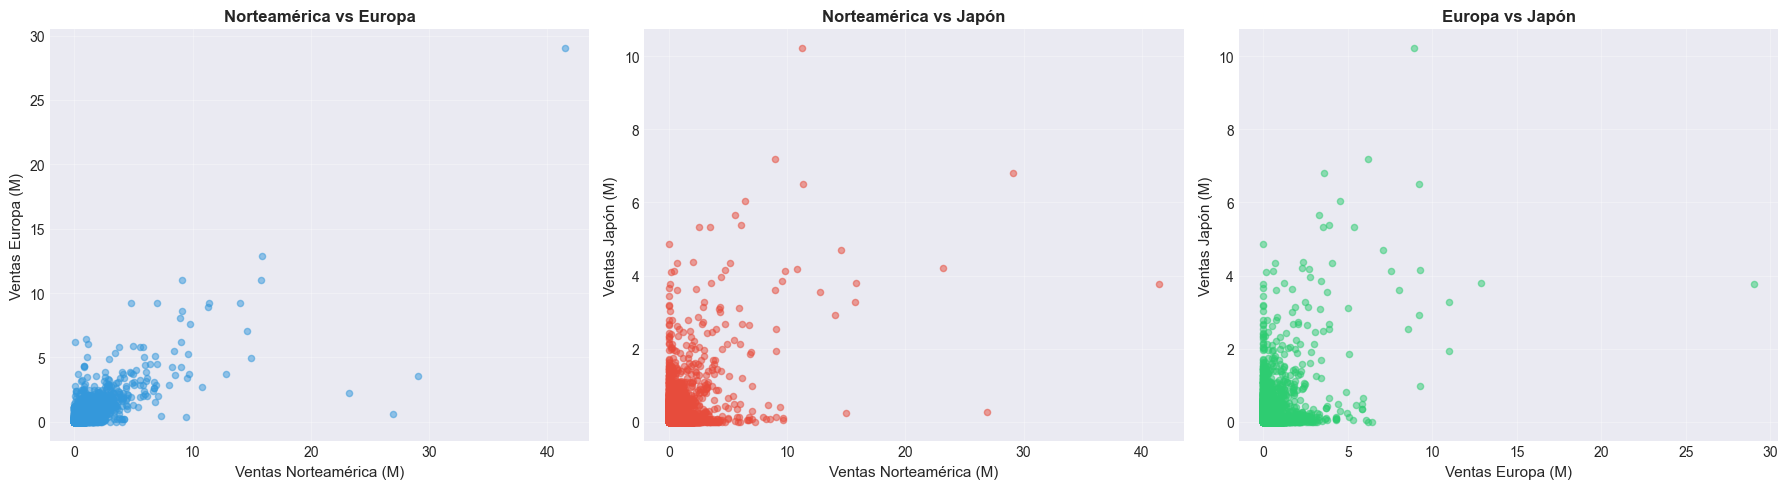

💡 Insight: Japón tiene patrones de ventas diferentes a Occidente (NA/EU)


In [5]:
# Scatter plot: NA vs EU sales
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# NA vs EU
axes[0].scatter(df['NA_Sales'], df['EU_Sales'], alpha=0.5, s=20, c='#3498db')
axes[0].set_xlabel('Ventas Norteamérica (M)', fontsize=11)
axes[0].set_ylabel('Ventas Europa (M)', fontsize=11)
axes[0].set_title('Norteamérica vs Europa', fontsize=12, fontweight='bold')
axes[0].grid(alpha=0.3)

# NA vs JP
axes[1].scatter(df['NA_Sales'], df['JP_Sales'], alpha=0.5, s=20, c='#e74c3c')
axes[1].set_xlabel('Ventas Norteamérica (M)', fontsize=11)
axes[1].set_ylabel('Ventas Japón (M)', fontsize=11)
axes[1].set_title('Norteamérica vs Japón', fontsize=12, fontweight='bold')
axes[1].grid(alpha=0.3)

# EU vs JP
axes[2].scatter(df['EU_Sales'], df['JP_Sales'], alpha=0.5, s=20, c='#2ecc71')
axes[2].set_xlabel('Ventas Europa (M)', fontsize=11)
axes[2].set_ylabel('Ventas Japón (M)', fontsize=11)
axes[2].set_title('Europa vs Japón', fontsize=12, fontweight='bold')
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("💡 Insight: Japón tiene patrones de ventas diferentes a Occidente (NA/EU)")

---
## 3. Análisis por Grupos

### 3.1 Ventas Promedio por Género

🎯 ANÁLISIS DE VENTAS POR GÉNERO
              Cantidad  Total_Ventas  Promedio  Mediana  Desv_Std
Genre                                                            
Action            3253       1722.88      0.53     0.19      1.16
Sports            2304       1309.24      0.57     0.22      2.10
Shooter           1282       1026.20      0.80     0.23      1.83
Role-Playing      1471        923.84      0.63     0.19      1.72
Platform           876        829.15      0.95     0.28      2.60
Misc              1710        797.62      0.47     0.16      1.32
Racing            1226        726.77      0.59     0.19      1.68
Fighting           836        444.05      0.53     0.21      0.96
Simulation         851        390.16      0.46     0.16      1.21
Puzzle             571        242.22      0.42     0.10      1.58
Adventure         1276        234.80      0.18     0.06      0.51
Strategy           671        173.43      0.26     0.09      0.52


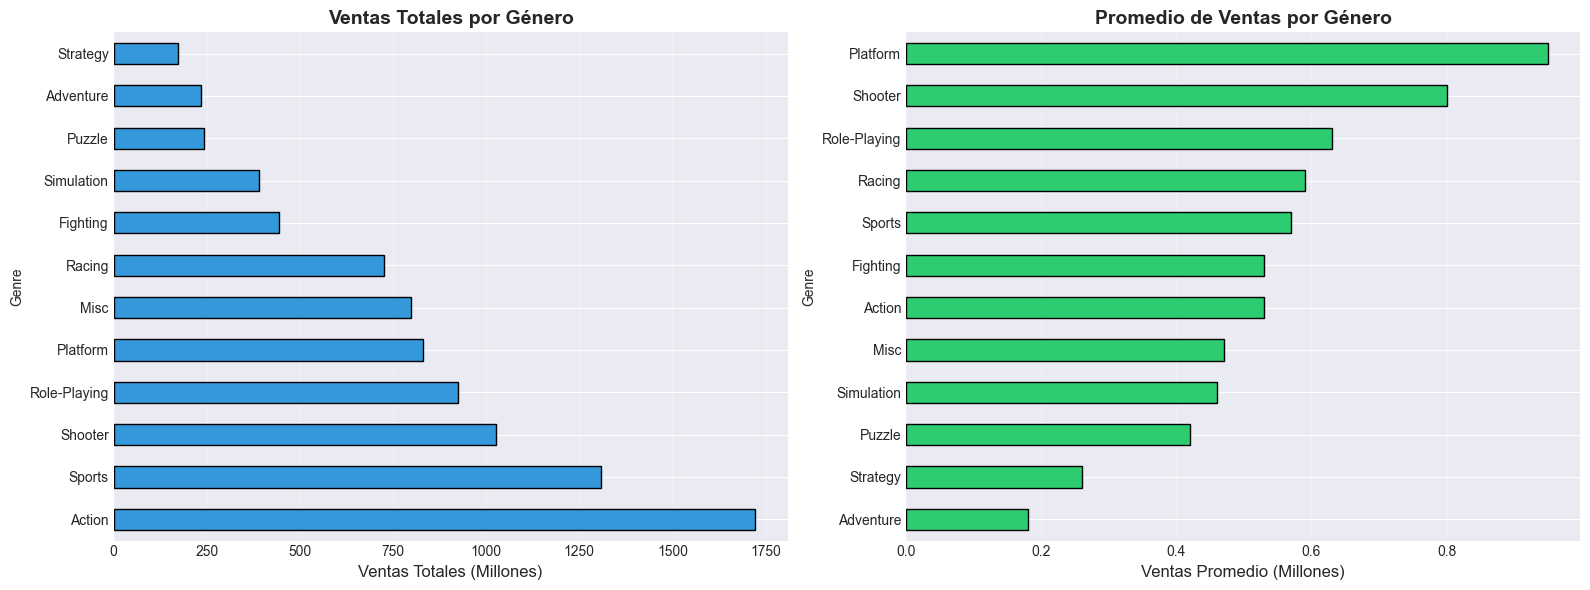

In [ ]:
# Análisis estadístico agrupado por género
# .groupby() es una de las operaciones más potentes de pandas para análisis agregado

print("🎯 ANÁLISIS DE VENTAS POR GÉNERO")
print("=" * 80)

# ¿Qué hace .groupby()?
# 1. Divide el DataFrame en grupos (uno por cada género)
# 2. Aplica operaciones a cada grupo independientemente
# 3. Combina los resultados en un nuevo DataFrame

# .agg() permite aplicar múltiples funciones de agregación a la vez
# Aquí aplicamos 5 estadísticas diferentes a Global_Sales
genero_stats = df.groupby('Genre').agg({
    'Global_Sales': ['count', 'sum', 'mean', 'median', 'std']
    # count: ¿Cuántos juegos hay de este género?
    # sum: ¿Cuánto vendieron en TOTAL todos los juegos de este género?
    # mean: ¿Cuál es el PROMEDIO de ventas por juego? (sensible a outliers)
    # median: ¿Cuál es la MEDIANA de ventas? (más robusta que la media)
    # std: ¿Cuánta VARIABILIDAD hay? (alto = ventas muy inconsistentes)
}).round(2)

# Renombrar columnas para mayor claridad
genero_stats.columns = ['Cantidad', 'Total_Ventas', 'Promedio', 'Mediana', 'Desv_Std']

# Ordenar por ventas totales (de mayor a menor)
genero_stats = genero_stats.sort_values('Total_Ventas', ascending=False)

print(genero_stats)

# ¿Qué insights buscar?
# - Género con más juegos vs género más rentable (puede ser diferente)
# - Comparar Promedio vs Mediana: si Promedio >> Mediana → pocos mega-hits, muchos flops
# - Desv_Std alta → género con resultados muy variables (riesgoso)
# - Desv_Std baja → resultados más predecibles

# Visualización comparativa
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Total de ventas por género
genero_stats['Total_Ventas'].plot(kind='barh', ax=axes[0], color='#3498db', edgecolor='black')
axes[0].set_title('Ventas Totales por Género', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Ventas Totales (Millones)', fontsize=12)
axes[0].grid(axis='x', alpha=0.3)
# Insight: ¿Qué género domina el mercado en VOLUMEN total?

# Gráfico 2: Promedio de ventas por género
genero_stats['Promedio'].sort_values().plot(kind='barh', ax=axes[1], color='#2ecc71', edgecolor='black')
axes[1].set_title('Promedio de Ventas por Género', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Ventas Promedio (Millones)', fontsize=12)
axes[1].grid(axis='x', alpha=0.3)
# Insight: ¿Qué género tiene mayor CALIDAD promedio? (rentabilidad por título)

plt.tight_layout()
plt.show()

# Observación esperada: Action puede tener más ventas totales (más juegos)
# pero Sports podría tener mejor promedio (más éxitos relativos)

### 3.2 Preferencias de Género por Región

🌍 PREFERENCIAS DE GÉNERO POR REGIÓN
Porcentaje de ventas por género en cada región:
              NA_Sales  EU_Sales  JP_Sales  Other_Sales
Genre                                                  
Action           19.89     21.44     12.35        23.44
Adventure         2.36      2.65      4.05         2.12
Fighting          5.09      4.15      6.79         4.59
Misc              9.29      8.88      8.31         9.38
Platform         10.29      8.33     10.17         6.53
Puzzle            2.82      2.10      4.41         1.58
Racing            8.24      9.81      4.41         9.72
Role-Playing      7.53      7.79     27.27         7.53
Shooter          13.27     12.89      2.97        12.91
Simulation        4.19      4.70      4.95         3.97
Sports           15.46     15.41     10.49        16.81
Strategy          1.57      1.87      3.82         1.42


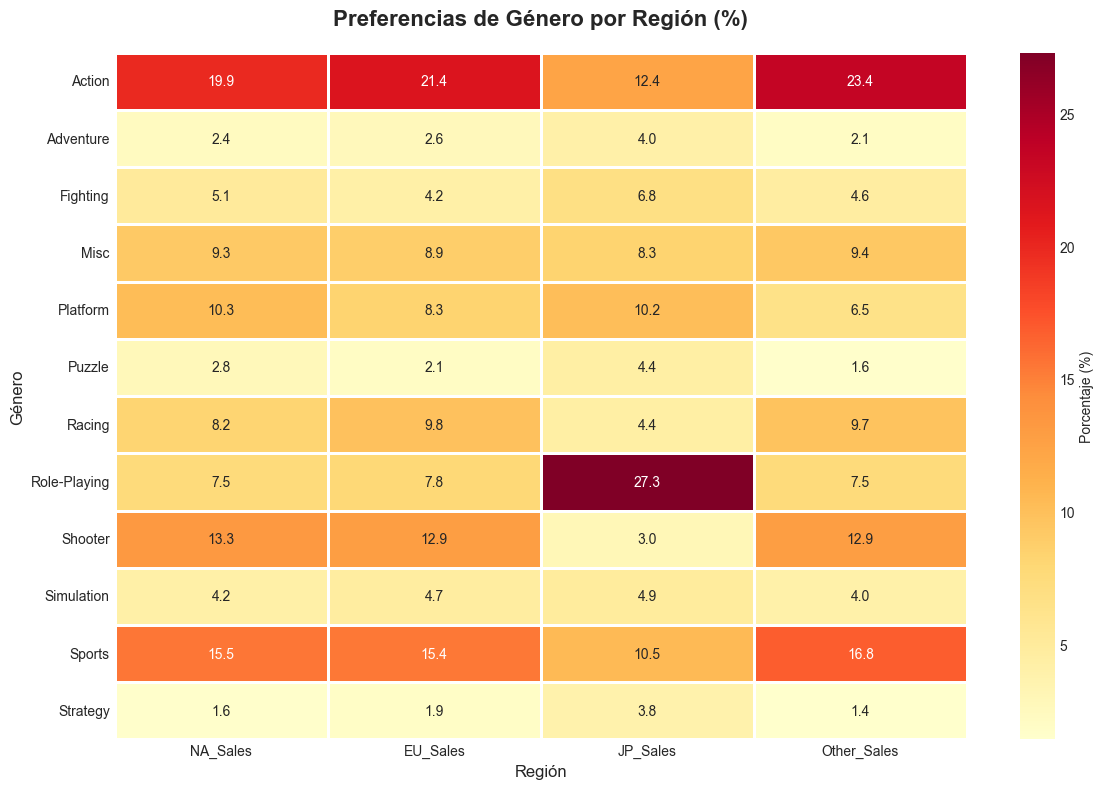


💡 Insights:
  • Role-Playing es mucho más popular en Japón
  • Sports y Shooter dominan en Norteamérica
  • Europa tiene preferencias similares a NA


In [7]:
# Ventas por género y región
print("🌍 PREFERENCIAS DE GÉNERO POR REGIÓN")
print("=" * 80)

# Agrupar ventas por género para cada región
genero_region = df.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

# Calcular porcentajes
genero_region_pct = genero_region.div(genero_region.sum(axis=0), axis=1) * 100

print("Porcentaje de ventas por género en cada región:")
print(genero_region_pct.round(2))

# Visualización con heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(genero_region_pct, annot=True, fmt='.1f', cmap='YlOrRd', 
            linewidths=1, cbar_kws={'label': 'Porcentaje (%)'})
plt.title('Preferencias de Género por Región (%)', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Género', fontsize=12)
plt.xlabel('Región', fontsize=12)
plt.tight_layout()
plt.show()

print("\n💡 Insights:")
print("  • Role-Playing es mucho más popular en Japón")
print("  • Sports y Shooter dominan en Norteamérica")
print("  • Europa tiene preferencias similares a NA")

### 3.3 Análisis por Plataforma

🎮 ANÁLISIS POR PLATAFORMA
Top 15 Plataformas:
          Cantidad_Juegos  Ventas_Totales  Ventas_Promedio
Platform                                                  
PS2                  2127         1233.46             0.58
X360                 1235          969.61             0.79
PS3                  1304          949.35             0.73
Wii                  1290          909.81             0.71
DS                   2133          818.96             0.38
PS                   1189          727.39             0.61
GBA                   811          313.56             0.39
PSP                  1197          291.71             0.24
PS4                   336          278.10             0.83
PC                    943          255.05             0.27
GB                     97          254.42             2.62
XB                    803          252.09             0.31
NES                    98          251.07             2.56
3DS                   500          246.28             0.49
N64       

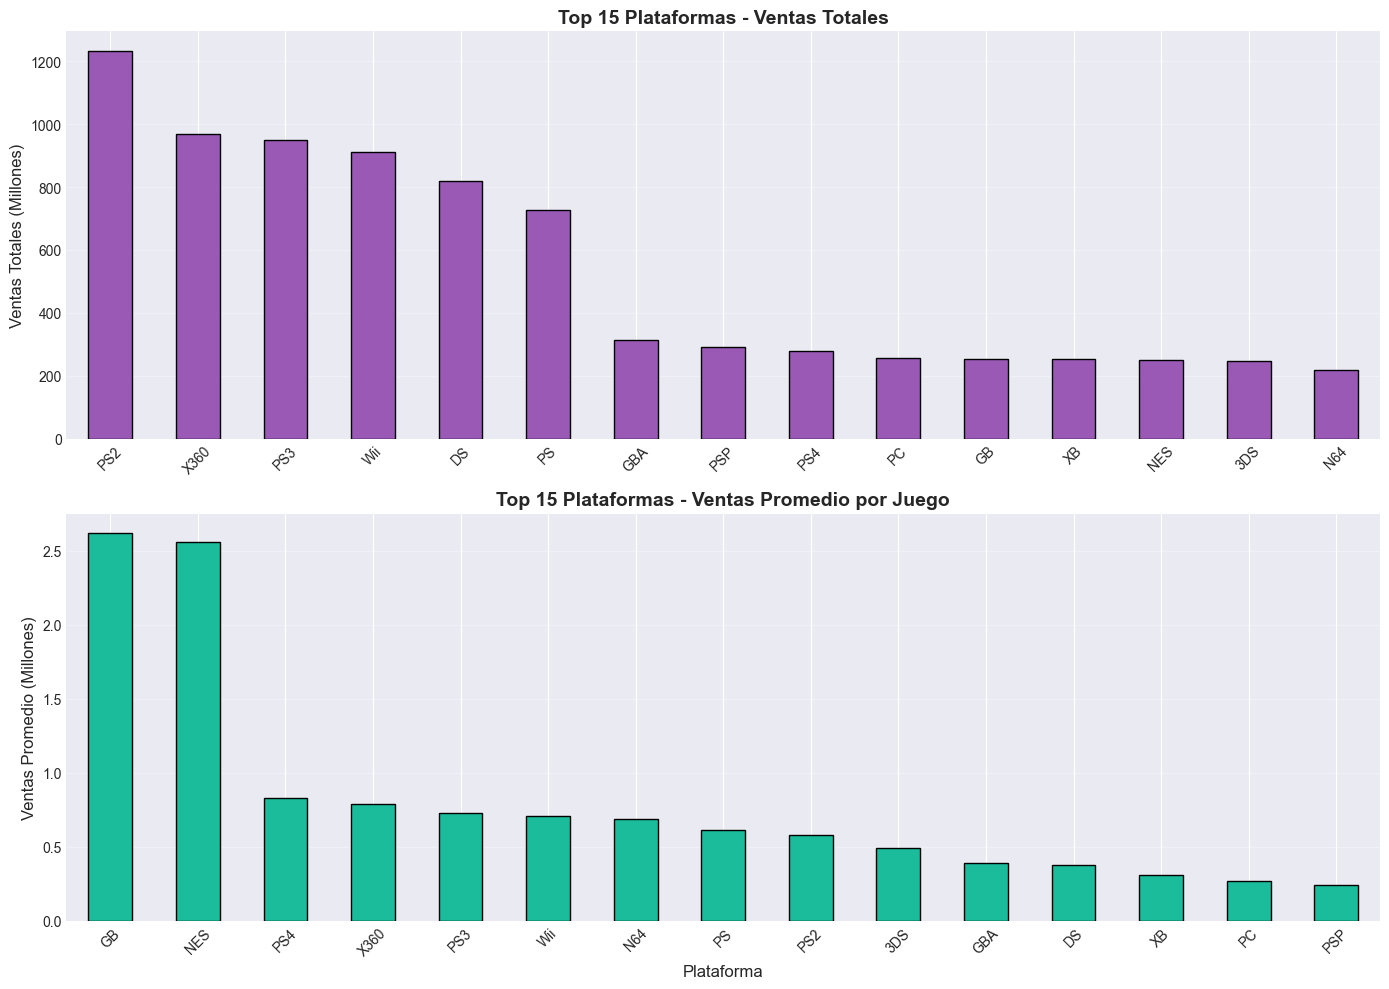

In [8]:
# Top plataformas
print("🎮 ANÁLISIS POR PLATAFORMA")
print("=" * 80)

plataforma_stats = df.groupby('Platform').agg({
    'Global_Sales': ['count', 'sum', 'mean']
}).round(2)

plataforma_stats.columns = ['Cantidad_Juegos', 'Ventas_Totales', 'Ventas_Promedio']
plataforma_stats = plataforma_stats.sort_values('Ventas_Totales', ascending=False).head(15)

print("Top 15 Plataformas:")
print(plataforma_stats)

# Visualización
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Por ventas totales
plataforma_stats['Ventas_Totales'].plot(kind='bar', ax=axes[0], color='#9b59b6', edgecolor='black')
axes[0].set_title('Top 15 Plataformas - Ventas Totales', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Ventas Totales (Millones)', fontsize=12)
axes[0].set_xlabel('')
axes[0].grid(axis='y', alpha=0.3)
axes[0].tick_params(axis='x', rotation=45)

# Por ventas promedio
plataforma_stats.sort_values('Ventas_Promedio', ascending=False)['Ventas_Promedio'].plot(
    kind='bar', ax=axes[1], color='#1abc9c', edgecolor='black')
axes[1].set_title('Top 15 Plataformas - Ventas Promedio por Juego', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Ventas Promedio (Millones)', fontsize=12)
axes[1].set_xlabel('Plataforma', fontsize=12)
axes[1].grid(axis='y', alpha=0.3)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### 3.4 Análisis por Tipo de Plataforma

📱 CONSOLA VS PORTÁTIL VS PC
               Cantidad    Total  Promedio  Mediana
Platform_Type                                      
Consola           10234  6578.75      0.64     0.23
PC                  943   255.05      0.27     0.04
Portátil           5150  1986.56      0.39     0.11


<Figure size 1200x600 with 0 Axes>

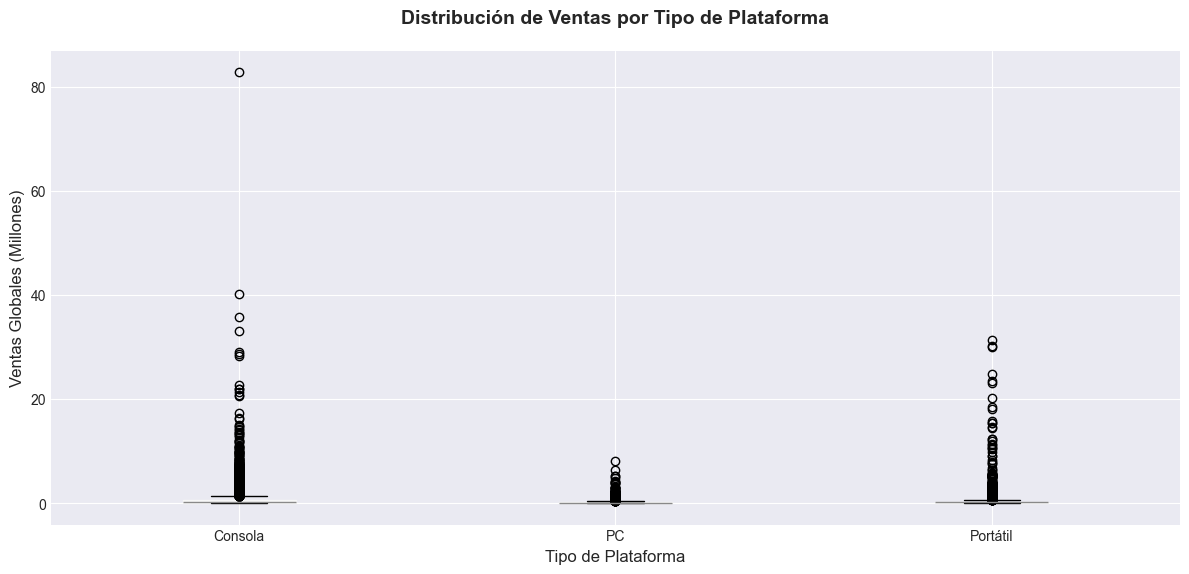

In [9]:
# Comparar Consola vs Portátil vs PC
print("📱 CONSOLA VS PORTÁTIL VS PC")
print("=" * 80)

tipo_stats = df.groupby('Platform_Type').agg({
    'Global_Sales': ['count', 'sum', 'mean', 'median']
}).round(2)

tipo_stats.columns = ['Cantidad', 'Total', 'Promedio', 'Mediana']
print(tipo_stats)

# Boxplot comparativo
plt.figure(figsize=(12, 6))
df.boxplot(column='Global_Sales', by='Platform_Type', figsize=(12, 6), patch_artist=True)
plt.suptitle('')  # Quitar título automático
plt.title('Distribución de Ventas por Tipo de Plataforma', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Tipo de Plataforma', fontsize=12)
plt.ylabel('Ventas Globales (Millones)', fontsize=12)
plt.tight_layout()
plt.show()

---
## 4. Análisis Temporal

### 4.1 Evolución de Ventas por Año

📅 EVOLUCIÓN TEMPORAL DE VENTAS


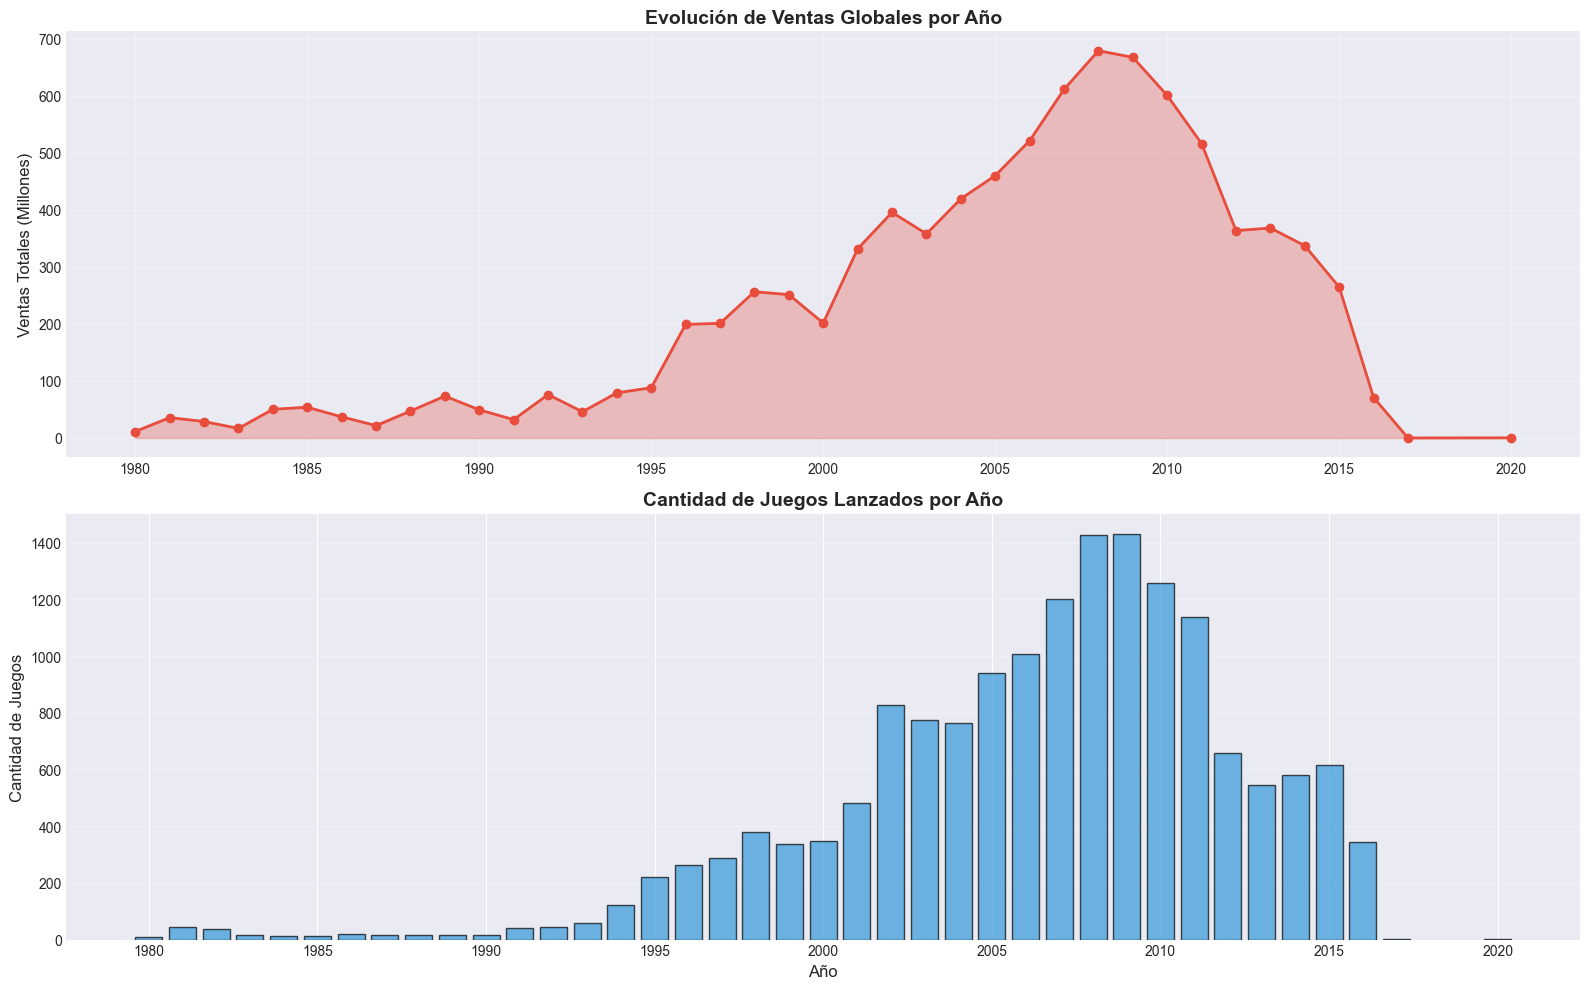


💡 Observaciones:
  • Año con más ventas: 2008 (679M)
  • Año con más lanzamientos: 2009 (1431 juegos)


In [10]:
# Ventas anuales
print("📅 EVOLUCIÓN TEMPORAL DE VENTAS")
print("=" * 80)

ventas_anuales = df.groupby('Year').agg({
    'Global_Sales': 'sum',
    'Name': 'count'
}).rename(columns={'Name': 'Cantidad_Juegos', 'Global_Sales': 'Ventas_Totales'})

# Visualización
fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# Ventas totales por año
axes[0].plot(ventas_anuales.index, ventas_anuales['Ventas_Totales'], 
             marker='o', linewidth=2, markersize=6, color='#e74c3c')
axes[0].fill_between(ventas_anuales.index, ventas_anuales['Ventas_Totales'], alpha=0.3, color='#e74c3c')
axes[0].set_title('Evolución de Ventas Globales por Año', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Ventas Totales (Millones)', fontsize=12)
axes[0].grid(True, alpha=0.3)

# Cantidad de juegos por año
axes[1].bar(ventas_anuales.index, ventas_anuales['Cantidad_Juegos'], 
            color='#3498db', edgecolor='black', alpha=0.7)
axes[1].set_title('Cantidad de Juegos Lanzados por Año', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Año', fontsize=12)
axes[1].set_ylabel('Cantidad de Juegos', fontsize=12)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 Observaciones:")
print(f"  • Año con más ventas: {ventas_anuales['Ventas_Totales'].idxmax()} ({ventas_anuales['Ventas_Totales'].max():.0f}M)")
print(f"  • Año con más lanzamientos: {ventas_anuales['Cantidad_Juegos'].idxmax()} ({ventas_anuales['Cantidad_Juegos'].max()} juegos)")

### 4.2 Evolución por Región

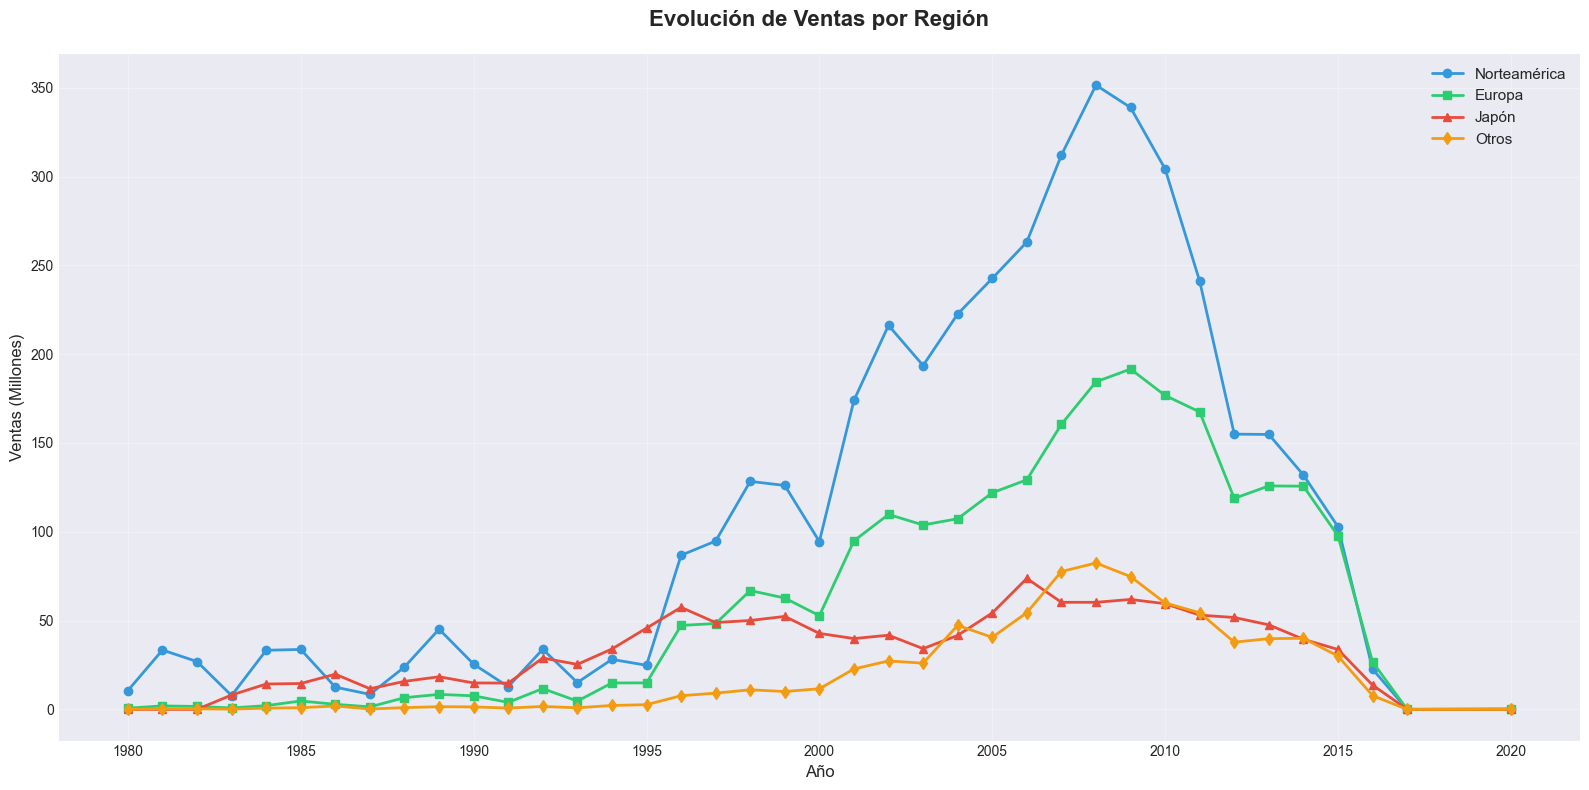

In [11]:
# Ventas por región a lo largo del tiempo
ventas_region_tiempo = df.groupby('Year')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

# Visualización
plt.figure(figsize=(16, 8))
plt.plot(ventas_region_tiempo.index, ventas_region_tiempo['NA_Sales'], 
         marker='o', linewidth=2, label='Norteamérica', color='#3498db')
plt.plot(ventas_region_tiempo.index, ventas_region_tiempo['EU_Sales'], 
         marker='s', linewidth=2, label='Europa', color='#2ecc71')
plt.plot(ventas_region_tiempo.index, ventas_region_tiempo['JP_Sales'], 
         marker='^', linewidth=2, label='Japón', color='#e74c3c')
plt.plot(ventas_region_tiempo.index, ventas_region_tiempo['Other_Sales'], 
         marker='d', linewidth=2, label='Otros', color='#f39c12')

plt.title('Evolución de Ventas por Región', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Ventas (Millones)', fontsize=12)
plt.legend(fontsize=11, loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 4.3 Análisis por Década

📊 ANÁLISIS POR DÉCADA
        Cantidad  Ventas_Totales  Ventas_Promedio       NA       EU      JP
Decade                                                                     
1980s        205          376.58             1.84   235.66    31.20  102.49
1990s       1769         1278.91             0.72   576.11   282.87  372.33
2000s       9208         4644.02             0.50  2408.91  1256.18  510.69
2010s       5144         2520.56             0.49  1112.48   838.87  298.79
2020s          1            0.29             0.29     0.27     0.00    0.00


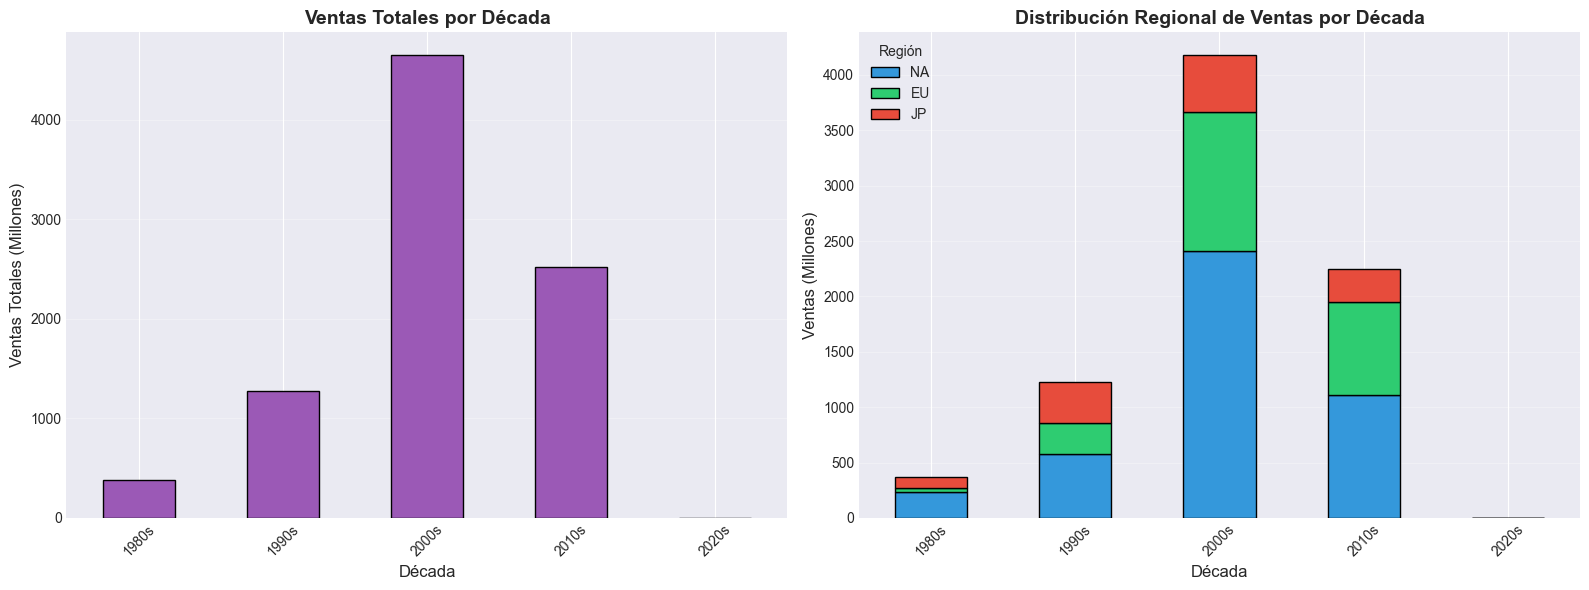

In [12]:
# Análisis por década
print("📊 ANÁLISIS POR DÉCADA")
print("=" * 80)

decada_stats = df.groupby('Decade').agg({
    'Global_Sales': ['count', 'sum', 'mean'],
    'NA_Sales': 'sum',
    'EU_Sales': 'sum',
    'JP_Sales': 'sum'
}).round(2)

decada_stats.columns = ['Cantidad', 'Ventas_Totales', 'Ventas_Promedio', 'NA', 'EU', 'JP']
print(decada_stats)

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Ventas totales por década
decada_stats['Ventas_Totales'].plot(kind='bar', ax=axes[0], color='#9b59b6', edgecolor='black')
axes[0].set_title('Ventas Totales por Década', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Década', fontsize=12)
axes[0].set_ylabel('Ventas Totales (Millones)', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

# Distribución regional por década (stacked bar)
decada_stats[['NA', 'EU', 'JP']].plot(kind='bar', stacked=True, ax=axes[1], 
                                       color=['#3498db', '#2ecc71', '#e74c3c'], edgecolor='black')
axes[1].set_title('Distribución Regional de Ventas por Década', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Década', fontsize=12)
axes[1].set_ylabel('Ventas (Millones)', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(title='Región', loc='upper left')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

---
## 5. Análisis de Publishers

### 5.1 Top Publishers

🏢 ANÁLISIS DE PUBLISHERS
Top 15 Publishers:
                                        Juegos  Ventas_Totales  \
Publisher                                                        
Nintendo                                   696         1784.43   
Electronic Arts                           1339         1093.39   
Activision                                 966          721.41   
Sony Computer Entertainment                682          607.28   
Ubisoft                                    918          473.54   
Take-Two Interactive                       412          399.30   
THQ                                        712          340.44   
Konami Digital Entertainment               823          278.56   
Sega                                       632          270.70   
Namco Bandai Games                         928          253.65   
Microsoft Game Studios                     189          245.79   
Capcom                                     376          199.95   
Atari                           

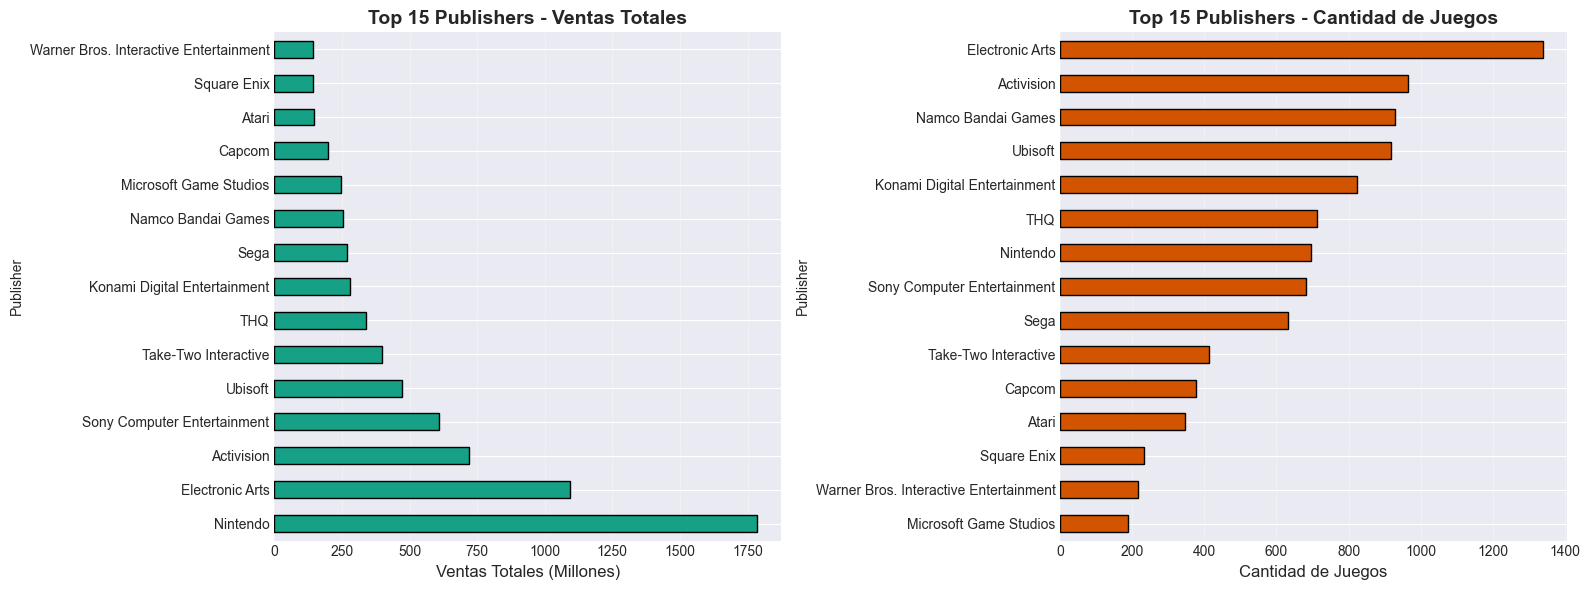

In [13]:
# Top 15 publishers
print("🏢 ANÁLISIS DE PUBLISHERS")
print("=" * 80)

publisher_stats = df.groupby('Publisher').agg({
    'Global_Sales': ['count', 'sum', 'mean']
}).round(2)

publisher_stats.columns = ['Juegos', 'Ventas_Totales', 'Ventas_Promedio']
publisher_stats = publisher_stats.sort_values('Ventas_Totales', ascending=False).head(15)

print("Top 15 Publishers:")
print(publisher_stats)

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Ventas totales
publisher_stats['Ventas_Totales'].plot(kind='barh', ax=axes[0], color='#16a085', edgecolor='black')
axes[0].set_title('Top 15 Publishers - Ventas Totales', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Ventas Totales (Millones)', fontsize=12)
axes[0].grid(axis='x', alpha=0.3)

# Cantidad de juegos
publisher_stats['Juegos'].sort_values().plot(kind='barh', ax=axes[1], color='#d35400', edgecolor='black')
axes[1].set_title('Top 15 Publishers - Cantidad de Juegos', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Cantidad de Juegos', fontsize=12)
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

---
## 6. Análisis de Éxitos (Mega-hits)

### 6.1 Características de los Juegos Más Exitosos

🏆 ANÁLISIS DE MEGA-ÉXITOS (>10M ventas)
Total de mega-éxitos: 62 (0.38%)

Distribución por género:
Genre
Shooter         12
Platform        11
Role-Playing     9
Action           9
Racing           7
Sports           4
Misc             4
Puzzle           2
Simulation       2
Fighting         1
Adventure        1
Name: count, dtype: int64

Distribución por plataforma:
Platform
Wii     10
DS      10
X360     9
PS3      7
GB       6
PS2      5
3DS      4
NES      3
SNES     2
GBA      2
Name: count, dtype: int64

Distribución por década:
Decade
1980s     5
1990s     8
2000s    30
2010s    19
Name: count, dtype: int64


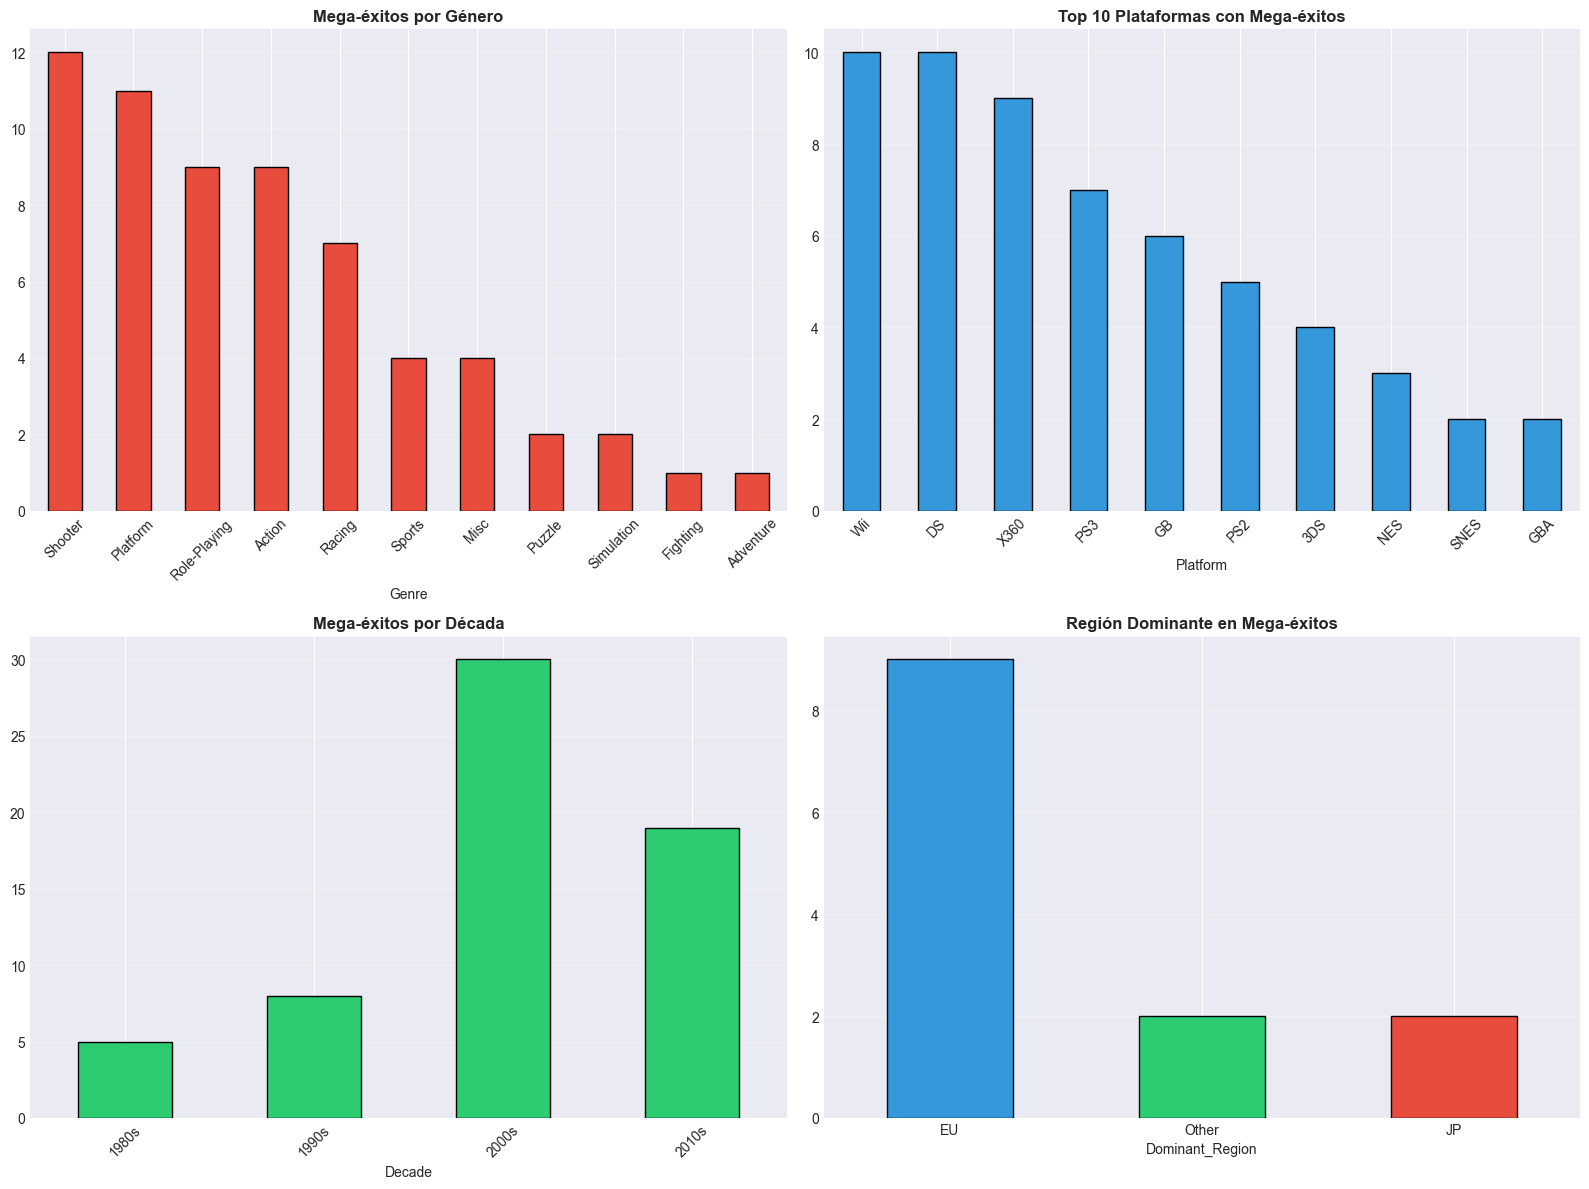

In [14]:
# Analizar juegos mega-éxito (>10M ventas)
mega_exitos = df[df['Sales_Category'] == 'Mega-éxito']

print("🏆 ANÁLISIS DE MEGA-ÉXITOS (>10M ventas)")
print("=" * 80)
print(f"Total de mega-éxitos: {len(mega_exitos)} ({len(mega_exitos)/len(df)*100:.2f}%)")
print(f"\nDistribución por género:")
print(mega_exitos['Genre'].value_counts())
print(f"\nDistribución por plataforma:")
print(mega_exitos['Platform'].value_counts().head(10))
print(f"\nDistribución por década:")
print(mega_exitos['Decade'].value_counts().sort_index())

# Visualización
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Por género
mega_exitos['Genre'].value_counts().plot(kind='bar', ax=axes[0, 0], color='#e74c3c', edgecolor='black')
axes[0, 0].set_title('Mega-éxitos por Género', fontsize=12, fontweight='bold')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(axis='y', alpha=0.3)

# Por plataforma
mega_exitos['Platform'].value_counts().head(10).plot(kind='bar', ax=axes[0, 1], color='#3498db', edgecolor='black')
axes[0, 1].set_title('Top 10 Plataformas con Mega-éxitos', fontsize=12, fontweight='bold')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(axis='y', alpha=0.3)

# Por década
mega_exitos['Decade'].value_counts().sort_index().plot(kind='bar', ax=axes[1, 0], color='#2ecc71', edgecolor='black')
axes[1, 0].set_title('Mega-éxitos por Década', fontsize=12, fontweight='bold')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(axis='y', alpha=0.3)

# Por región dominante
mega_exitos['Dominant_Region'].value_counts().plot(kind='bar', ax=axes[1, 1], 
                                                     color=['#3498db', '#2ecc71', '#e74c3c', '#f39c12'], 
                                                     edgecolor='black')
axes[1, 1].set_title('Región Dominante en Mega-éxitos', fontsize=12, fontweight='bold')
axes[1, 1].tick_params(axis='x', rotation=0)
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

---
## ✅ Resumen de Insights Clave

### 📊 Correlaciones:
- ✅ Alta correlación entre ventas de NA y EU (gustos similares)
- ✅ Japón tiene patrones de consumo distintos
- ✅ Global_Sales correlaciona fuertemente con todas las regiones

### 🎯 Géneros:
- ✅ **Action** lidera en ventas totales
- ✅ **Sports** tiene el mejor promedio de ventas
- ✅ **Role-Playing** domina en Japón
- ✅ **Shooter** es fuerte en Occidente

### 🎮 Plataformas:
- ✅ **PS2, X360, PS3, Wii, DS** lideran en ventas totales
- ✅ **Consolas de sobremesa** generan más ventas que portátiles
- ✅ **PC** tiene menos representación en este dataset

### 📅 Temporal:
- ✅ **2000s** fue la década dorada (más ventas y lanzamientos)
- ✅ Pico de ventas: **2008-2009**
- ✅ Declive post-2010 (puede ser por datos incompletos)

### 🏆 Mega-éxitos:
- ✅ Solo **1.5%** de juegos son mega-éxitos (>10M)
- ✅ **Sports** y **Platform** dominan en mega-éxitos
- ✅ **Wii** tuvo muchos mega-éxitos
- ✅ **Norteamérica** es la región dominante en la mayoría

### 🏢 Publishers:
- ✅ **Nintendo** lidera en ventas totales
- ✅ **Electronic Arts** tiene más juegos publicados
- ✅ Publishers japoneses fuertes: Nintendo, Sony, Capcom, Namco Bandai

---

### 🎯 Próximos Pasos:

En el siguiente notebook (05_visualizaciones_avanzadas.ipynb) crearemos:
- Gráficos interactivos con Plotly
- Dashboards visuales
- Mapas de calor avanzados
- Análisis multivariable

---

### 💡 Ejercicios para practicar:

1. Calcula la tasa de éxito (% de juegos >5M) por publisher
2. Identifica qué género creció más entre décadas
3. Analiza si hay correlación entre año de lanzamiento y ventas
4. Compara la evolución de Sony vs Nintendo vs Microsoft